1) Get the provided datasets from D2L. Then for each dataset:
1) Visualize the data w/ labels using 2 or 3-D tSNE.
1) Write your own version of an active learning rare class discovery algorithm.

1) Run your code on the dataset and keep track of the number of classes discovered vs. number of
queries.

1) Plot that (# classes discovered vs. # queries).

1) Rerun the same experiment using a random query strategy.

1) Plot the results from the random algorithm on the same plot.


In [16]:
#1. import libraries
import numpy as np
import matplotlib.pyplot as plt

import os

from graphviz import Digraph

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

from sklearn.datasets import fetch_openml

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import IsolationForest
from sklearn.svm import SVC
from sklearn.neighbors import LocalOutlierFactor

from sklearn.manifold import TSNE


from IPython.display import Image

from datetime import datetime

In [12]:
#homework framework
#check data path
data_path = '/../data/'


mnist_data_file = 'X_and_y1.npz'
#mnist_labels_file = 'mnist_full_labels_784.npy'

#objective 1, get Get the provided datasets from D2L. Then for each dataset:
if os.path.exists(data_file := os.path.normpath(os.getcwd() + data_path + mnist_data_file)):
    X_and_y = np.load(data_file, allow_pickle=True)
    X = X_and_y['X']
    y = X_and_y['y']

#if os.path.exists(os.getcwd() + data_path + mnist_labels_file):
#    y = np.load(os.getcwd() + data_path + mnist_labels_file, allow_pickle=True)

#define report location
report_folder = '/report/'
report_images = report_folder + 'resources/images/'

#check if the folder exists
if not os.path.exists(report_image_path := os.path.normpath(os.getcwd() + report_images)):
    os.makedirs(os.getcwd() + report_images)
    
if not os.path.exists(os.path.normpath(os.getcwd() + report_images)):
    print(f'{report_image_path} could not be created')
    exit()

print(f'Using {report_image_path} for report images.')


Using h:\dev\git\csc730\assignment 9\report\resources\images for report images.


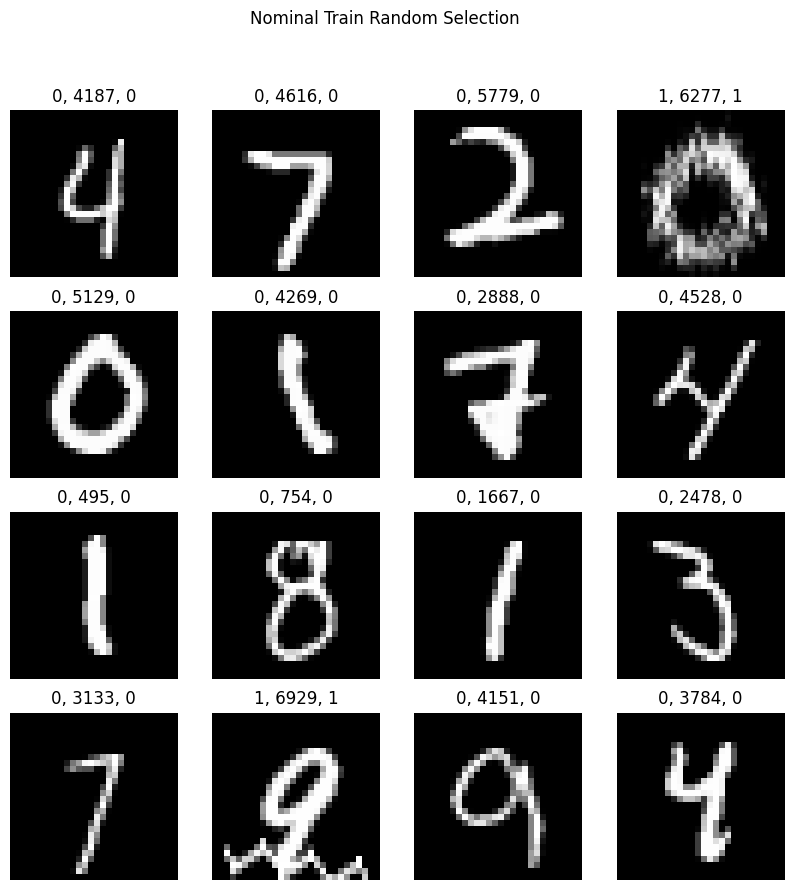

Unique labels: [0 1]


In [15]:
#generate example data figures
fig, ax = plt.subplots(4, 4, figsize=(10, 10))
for i in range(4):
    for j in range(4):
        index = np.random.randint(0, X.shape[0])
        ax[i, j].imshow(X[index].reshape(28, 28), cmap='gray')
        ax[i, j].set_title(f'{y[index]}, {index}, {y[index]}')
        ax[i, j].axis('off')
plt.suptitle('Nominal Train Random Selection')        
plt.savefig(report_image_path + '_nominal_train_random_selection.png')
plt.show()

print(f'Unique labels: {np.unique(y)}')

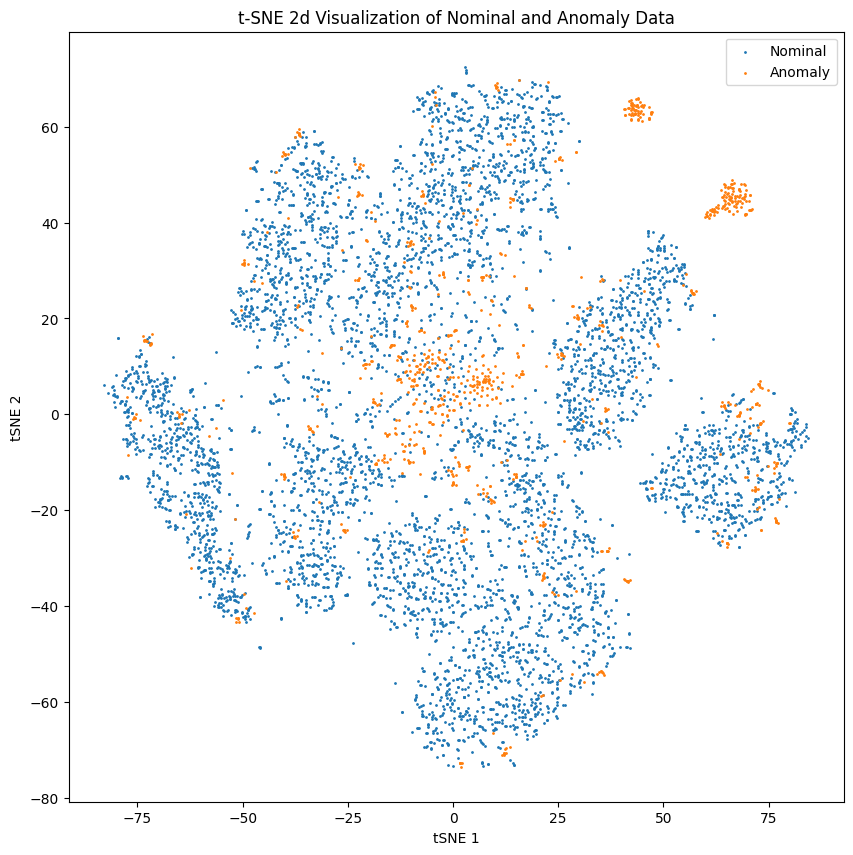

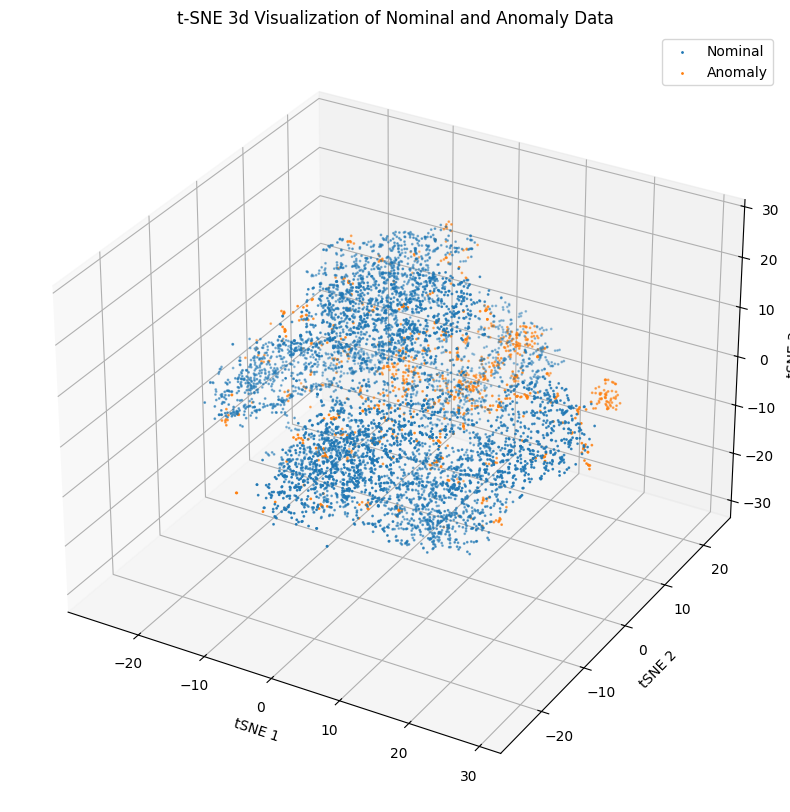

In [23]:
#objective 2 - Visualize the data w/ labels using 2 or 3-D tSNE.

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for i in np.unique(y):
    ax.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], label= ['Nominal', 'Anomaly'][i], s=1)
ax.set_xlabel('tSNE 1')
ax.set_ylabel('tSNE 2')

ax.legend()
plt.title('t-SNE 2d Visualization of Nominal and Anomaly Data')
plt.savefig(report_image_path + '_tsne.png')
plt.show()

tsne_3d = TSNE(n_components=3, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
for i in np.unique(y):
    ax.scatter(X_tsne_3d[y == i, 0], X_tsne_3d[y == i, 1], X_tsne_3d[y == i, 2], label= ['Nominal', 'Anomaly'][i], s=1)
ax.set_xlabel('tSNE 1')
ax.set_ylabel('tSNE 2')
ax.set_zlabel('tSNE 3')
ax.legend()
plt.title('t-SNE 3d Visualization of Nominal and Anomaly Data')
plt.savefig(report_image_path + '_tsne_3d.png')
plt.show()



In [ ]:

class active_model_learning():
    """
    Class for active model learning.

    Parameters:
    - model: The machine learning model to be trained.
    - accuracy_threshold: The threshold for accuracy. If the accuracy reaches or exceeds this threshold, the training stops. Default is 0.95.
    - max_iterations: The maximum number of iterations for training. Default is 1000.
    - verbose: Whether to print verbose output during training. Default is True.
    - random_state: The random state for reproducibility. Default is 42.
    - strategy_function: The strategy function for selecting the next data point to be labeled. Default is None.
    - test_split: The ratio of test data split. Default is 0.2.

    Attributes:
    - model: The machine learning model.
    - strategy_function: The strategy function for selecting the next data point to be labeled.
    - _test_split: The ratio of test data split.
    - _random_state: The random state for reproducibility.
    - confusion_matrices: List to store the confusion matrices for each iteration.
    - calculable_metrics: Dictionary to store the calculable metrics (accuracy, precision, recall, f1) for each iteration.
    - accuracy_threshold: The threshold for accuracy.
    - accuracy_threshold_reached: Whether the accuracy threshold has been reached.
    - max_iterations: The maximum number of iterations for training.
    - current_iteration: The current iteration.
    - verbose: Whether to print verbose output during training.
    - X_test: The test data.
    - y_test: The test labels.
    - _next_index: The index of the next data point to be labeled.

    Methods:
    - _select_point_from_pool: Selects a data point from the unlabeled pool and adds it to the labeled pool.
    - _train_model: Trains the model on the labeled data.
    - test_model: Tests the model on the given data and stores the confusion matrix.
    - _test_model: Tests the model on the test data.
    - evaluate_model: Evaluates the model on the given data and calculates the accuracy, precision, recall, and f1 score.
    - _evaluate_model: Evaluates the model on the test data.
    - utility_function: Calculates the utility function for the given data.
    - utility_function_index: Calculates the index of the data point with the highest uncertainty.
    - _utility_function_index: Calculates the index of the next data point to be labeled.
    - _run_next: Checks if the training should continue to the next iteration.
    - report: Prints the final accuracy, confusion matrix, iteration, and whether the accuracy threshold has been reached.
    - generate_graphs: Generates and displays graphs of the confusion matrices and accuracy over iterations.
    """
    def __init__(self, model, accuracy_threshold=0.95, max_iterations=1000, verbose=True, random_state=42, strategy_function=None,  test_split=0.2, save_path=None):
        self.model = model
        self.strategy_function = strategy_function
        
        self._test_split = test_split
        self._random_state = random_state                  
        
        self.confusion_matrices = []
        self.calculable_metrics = {"accuracy": [], "precision": [], "recall": [], "f1": [], "roc_auc": [], "pr_auc": []}
        self.accuracy_threshold = accuracy_threshold
        self.accuracy_threshold_reached = False
        self.max_iterations = max_iterations
        self.current_iteration = 0
        self.verbose = verbose
        self.X_test = None
        self.y_test = None
        self._next_index=0
        self.save_path = save_path
        
    def _select_point_from_pool(self):
        """
        Selects a data point from the unlabeled pool and adds it to the labeled pool.
        """
        if self.Dl_X.shape[0] == 0:
            self.Dl_X = self.Du_X[self._next_index].reshape(1, -1)
            self.Dl_y = np.array([self.Du_y[self._next_index]])
        else:        
            self.Dl_X = np.append(self.Dl_X,self.Du_X[self._next_index].reshape(1, -1), axis=0)
            self.Dl_y = np.append(self.Dl_y, [self.Du_y[self._next_index]], axis=0)
        
        #remove X[index] and y[index] from Du_X and Du_y
        self.Du_X = np.delete(self.Du_X, self._next_index, axis=0)
        self.Du_y = np.delete(self.Du_y, self._next_index, axis=0)
    
    def _train_model(self):
        """
        Trains the model on the labeled data.
        """
        if self.verbose:
            print(f"Training model on {len(self.Dl_X)} points. Iteration {self.current_iteration} at {datetime.now()}")
            start_time = datetime.now()
            
        try:
            self.model.fit(self.Dl_X, self.Dl_y)
        except ValueError as e:
            print(f"Error: {e}")
            print(f"Model: {self.model}")
            print(f"X: {self.Dl_X}")
            print(f"y: {self.Dl_y}")
            #add data point to the model and continue
            self._next_index = np.random.randint(0, self.Du_X.shape[0])
            self._select_point_from_pool()
        
        if self.verbose:
            print(f"Training time: {datetime.now() - start_time}")
        
    def test_model(self, X, y):
        """
        Tests the model on the given data and stores the confusion matrix.

        Parameters:
        - X: The input data.
        - y: The true labels.
        """
        y_pred = self.model.predict(X)
        self.confusion_matrices.append(confusion_matrix(y, y_pred))
        
        if self.verbose:
            print(f"Confusion matrix for iteration {self.current_iteration}: {self.confusion_matrices[-1]}")
            
    def _test_model(self):            
        """
        Tests the model on the test data.
        """
        self.test_model(self.X_test, self.y_test)        
        
    def evaluate_model(self, X, y):
        """
        Evaluates the model on the given data and calculates the accuracy, precision, recall, and f1 score.

        Parameters:
        - X: The input data.
        - y: The true labels.

        Returns:
        - accuracy: The accuracy of the model.
        """
        self.test_model(X, y)
        
        fp = (self.confusion_matrices[-1].sum(axis=0) - np.diag(self.confusion_matrices[-1]))
        fn = (self.confusion_matrices[-1].sum(axis=1) - np.diag(self.confusion_matrices[-1]))
        tp = np.diag(self.confusion_matrices[-1])
        tn = self.confusion_matrices[-1].sum() - (fn + tp + fn)
        
        accuracy = (tp + tn) / (tp + tn + fn + fp)
        self.calculable_metrics["accuracy"].append(accuracy)
        self.calculable_metrics["precision"].append(tp / (tp + fp))
        self.calculable_metrics["recall"].append(tp / (tp + fn))
        self.calculable_metrics["f1"].append(2 * (self.calculable_metrics["precision"][-1] * self.calculable_metrics["recall"][-1]) / (self.calculable_metrics["precision"][-1] + self.calculable_metrics["recall"][-1]))
        #self.calculable_metrics["roc_auc"].append(roc_auc_score(y, self.model.predict_proba(X)))
        #self.calculable_metrics["pr_auc"].append(auc(*precision_recall_curve(y, self.model.predict_proba(X))[:2]))        
        
        if self.verbose:
            print(f"Accuracy for iteration {self.current_iteration}: {accuracy}")
            
        if accuracy.min() >= self.accuracy_threshold:
            self.accuracy_threshold_reached = True
            if self.verbose:
                print(f"Accuracy threshold reached at iteration {self.current_iteration}")
        return accuracy

    def _evaluate_model(self):
        """
        Evaluates the model on the test data.

        Returns:
        - accuracy: The accuracy of the model.
        """
        return self.evaluate_model(self.X_test, self.y_test)
        
    def utility_function(self, X):
        """
        Calculates the utility function for the given data.

        Parameters:
        - X: The input data.

        Returns:
        - utility: The utility values for the data points.
        """
        #return the point with the highest uncertainty
        if self.strategy_function is None:
            #check if the model has a predict_proba method
            if not hasattr(self.model, "predict_proba"):
                array = np.zeros(X.shape[0])
                array[np.random.randint(0, X.shape[0])] = 1
                return array                
                
            return self.model.predict_proba(X)
        else:
            return self.strategy_function(self, X)
    
    def utility_function_index(self, X):
        """
        Calculates the index of the data point with the highest uncertainty.

        Parameters:
        - X: The input data.

        Returns:
        - index: The index of the data point with the highest uncertainty.
        """
        #return the point with the highest uncertainty
        return np.argmax(self.utility_function(X))
    
    def _utility_function_index(self):
        """
        Calculates the index of the next data point to be labeled.

        Returns:
        - index: The index of the next data point to be labeled.
        """
        #return the point with the highest uncertainty
        self._next_index = np.argmax(self.utility_function(self.Du_X))
        
        if self._next_index >= self.Du_X.shape[0]:
            if self.verbose:
                print(f"Index out of range: {self._next_index}")
            self._next_index = np.random.randint(0, self.Du_X.shape[0])
            
        if self.verbose:
            print(f"Selected index {self._next_index} for iteration {self.current_iteration}")
        return self._next_index
    def _run_next(self):
        """
        Checks if the training should continue to the next iteration.

        Returns:
        - continue_training: Whether the training should continue to the next iteration.
        """
        self.current_iteration += 1
        if self.accuracy_threshold_reached:
            return False
        if self.current_iteration >= self.max_iterations:
            return False
        return True
    
    def report(self):
        """
        Prints the final accuracy, confusion matrix, iteration, and whether the accuracy threshold has been reached.
        """
        print(f"Final accuracy: {self.evaluate_model(self.X_test, self.y_test)}")
        print(f"Final confusion matrix: {self.confusion_matrices[-1]}")
        print(f"Final iteration: {self.current_iteration}")
        print(f"Final accuracy threshold reached: {self.accuracy_threshold_reached}")
    
    def generate_graphs(self, save_figs=False, save_data=False, save_path=None):
        """
        Generates and displays graphs of the confusion matrices and accuracy over iterations.
        """
        #add 5 confusion matrices images into the main plot as insets
        figs = []
        axes = []
        
        fig, ax = plt.subplots(1, 5, figsize=(20, 4))
        figs.append(fig)
        axes.append(ax)
        indices_to_plot = np.linspace(1, len(self.confusion_matrices), 5).astype(int)
                
        for i in range(5):
            ax[i].imshow(self.confusion_matrices[indices_to_plot[i]-1], cmap='binary')
            ax[i].set_title(f"Confusion matrix {indices_to_plot[i]}")
        fig.suptitle(f"Confusion matrices for {self.model.__class__.__name__}", fontsize=24)
        
        fig.show()      
        
        fig, ax = plt.subplots(figsize=(20, 20))
        figs.append(fig)
        axes.append(ax)
        ax.plot(self.calculable_metrics["accuracy"], label=np.unique(self.Du_y))
        ax.set_title(f"Accuracy over iterations {self.model.__class__.__name__}\nStrategy: {self.strategy_function.__name__} ", fontsize=24)
        ax.set_xlabel("Iteration", fontsize=18)
        ax.set_ylabel("Accuracy", fontsize=18)  
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.legend(prop={'size': 14})                  
        plt.show()
        
        fig, ax = plt.subplots(figsize=(20, 20))
        figs.append(fig)
        axes.append(ax)
        ax.plot(np.average(np.array(self.calculable_metrics["accuracy"]),axis=1), label="Average accuracy")
        ax.plot(np.amin(np.array(self.calculable_metrics["accuracy"]),axis=1), label="Minimum accuracy")
        ax.plot(np.amax(np.array(self.calculable_metrics["accuracy"]),axis=1), label="Maximum accuracy")
        ax.set_title(f"Average accuracy over iterations {self.model.__class__.__name__}\nStrategy: {self.strategy_function.__name__}", fontsize=24)
        ax.set_xlabel("Iteration", fontsize=18)
        ax.set_ylabel("Accuracy", fontsize=18)
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.set_ylim([0, 1])
        ax.set_xlim([0, self.current_iteration])    
        
        
        ax.legend(prop={'size': 14})
        
        #add confusion matrix images into the main plot as insets
        #MARK: add confusion matrix images into the main plot as insets
        for i in range(5):
            #ax_inset = fig.add_axes([indices_to_plot[i]-1, indices_to_plot[i]+self.current_iteration/5, 0.4, 0.4 ])
            
            height_new_plot = 0.125
            width_new_plot = 0.125
            y_range = fig.axes[0].get_ylim()[1] - fig.axes[0].get_ylim()[0]            
            x_range = fig.axes[0].get_xlim()[1] - fig.axes[0].get_xlim()[0]
            
            y_point = np.average(np.array(self.calculable_metrics["accuracy"]),axis=1)[indices_to_plot[i]-1]
            x_point = indices_to_plot[i] - 1
                                    
            left_position =  0.02+(i/6.5)
            bottom_position = 0.25#(y_relative - height_new_plot) if y_relative < 0.5 else (y_relative + height_new_plot)
                        
            ax_inset = fig.add_axes([left_position+width_new_plot, bottom_position,width_new_plot,height_new_plot ],alpha=0.5)
            
            ax_inset.imshow(self.confusion_matrices[indices_to_plot[i]-1], cmap='binary')
            ax_inset.set_xticks(np.arange(0.5, 10.5, 1))
            ax_inset.set_yticks(np.arange(0.5, 10.5, 1))
            ax_inset.set_xticklabels(np.arange(0, 10, 1))
            ax_inset.set_yticklabels(np.arange(0, 10, 1))
            ax_inset.grid(True)
            #now draw a line to the data point
            
            #ax.plot([indices_to_plot[i]-1, indices_to_plot[i]-1], [bottom_position, np.average(np.array(self.calculable_metrics["accuracy"]),axis=1)[indices_to_plot[i]-1]], color='black', linestyle='--')
            
            ax_inset.set_title(f"Confusion matrix {indices_to_plot[i]}", fontsize=18)           
            #ax_inset.set_title(f"{left_position:0.2f}, {bottom_position:0.2f}, {width_new_plot:0.2f}, {height_new_plot:0.2f}")
        plt.show()
        
        
        
        if(save_figs == True) and ((self.save_path != None) or (save_path != None)):
            if save_path == None:
                save_path = self.save_path
            
            figs[0].suptitle(f"Confusion matrices for {self.model.__class__.__name__}\\n{'default strategy' if self.strategy_function==None else self.strategy_function.__name__} strategy")
            figs[0].savefig(save_path +f"confusion_matrices_{self.model.__class__.__name__}_{'default strategy' if self.strategy_function==None else self.strategy_function.__name__}.png")
            axes[1].set_title(f"Accuracy over iterations\nactive learning with {self.model.__class__.__name__} and {'default strategy' if self.strategy_function==None else self.strategy_function.__name__} strategy")
            figs[1].savefig(save_path +f"active_learning_{self.model.__class__.__name__}_{'default strategy' if self.strategy_function==None else self.strategy_function.__name__}.png")
            figs[2].savefig(save_path +f"active_learning_{self.model.__class__.__name__}_{'default strategy' if self.strategy_function==None else self.strategy_function.__name__}_average.png")
        if(save_figs == True) and ((self.save_path != None) or (save_path != None)):
            if save_path == None:
                save_path = self.save_path 
        
            np.savez(f"active_learning_{self.model.__class__.__name__}_{'default strategy' if self.strategy_function==None else self.strategy_function.__name__}.npz", confusion_matrices=self.confusion_matrices, calculable_metrics=self.calculable_metrics, allow_pickle=True)
        
        return figs, axes
    
    
    def fit(self, X, y):
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=self._test_split, random_state=self._random_state)           
                        
        self.Du_X = np.array(self.X_train); self.Du_y = np.array(self.y_train); self.Du = (self.Du_X, self.Du_y)
        #match the shape of the data, except for the index column which will be 1
        #shape = list(X.shape); shape[0] = 1; shape = tuple(shape)
        self.Dl_X = np.array([]); self.Dl_y = np.array([]); self.Dl = (self.Dl_X, self.Dl_y) 
        
        #select a point from the pool at random
        self._next_index = np.random.randint(0, self.Du_X.shape[0])
        self._select_point_from_pool()                     
        
        self._next_index = np.random.randint(0, self.Du_X.shape[0])
        self._select_point_from_pool()
        self._train_model()               
        
        while self._run_next():   
            self._utility_function_index()
            self._select_point_from_pool()
            self._train_model()
            self._evaluate_model()
                        
        if self.verbose:
            print(f"Model training complete at iteration {self.current_iteration}")
            
        return self.accuracy_threshold_reached

def default_strategy(obj, X):
    return obj.model.predict_proba(X)

def random_strategy(obj, X):
    array = np.zeros(X.shape[0])
    array[np.random.randint(0, X.shape[0])] = 1
    return array    

def uncertainty_strategy(obj, X):
    return 1 - obj.model.predict_proba(X).max(axis=1)

def entropy_strategy(obj, X):
    #return -np.sum(obj.model.predict_proba(X) * np.log(obj.model.predict_proba(X)), axis=1) 
    return -obj.model.predict_proba(X) * np.log(obj.model.predict_proba(X))

def lowest_vote_strategy(obj, X):
    #get the predictions from the model
    predictions = obj.model.predict(X)
    #get the unique predictions
    unique_predictions = np.unique(predictions)
    #get the number of unique predictions
    number_of_unique_predictions = unique_predictions.shape[0]
    #create an array to store the votes
    votes = np.zeros((X.shape[0], number_of_unique_predictions))
    #for each unique prediction
    for i, unique_prediction in enumerate(unique_predictions):
        #get the votes for the unique prediction
        votes[:, i] = predictions == unique_prediction
    #return the votes in least order to add least voted for points    
    return -votes

: 

In [ ]:
accuracy_threshold = 0.95
max_iterations = 1000
verbose = False
strategies = [default_strategy, random_strategy, uncertainty_strategy, entropy_strategy, lowest_vote_strategy]
#strategies = [lowest_vote_strategy]
models = [ RandomForestClassifier(n_estimators=100, random_state=42), SVC(probability=True, random_state=42)]
#models = [ SVC(probability=True, random_state=42)]
active_learner = []

for model in models:
    for strategy in strategies:
        active_learner.append(active_model_learning(model, accuracy_threshold=accuracy_threshold, max_iterations=max_iterations, verbose=verbose, strategy_function=strategy, test_split=0.2, random_state=42, save_path=report_images))
        active_learner[-1].fit(X, y)
        active_learner[-1].report()
        _ = active_learner[-1].generate_graphs(save_figs=True, save_data=True)
        
        plt.show()

: 